<a href="https://colab.research.google.com/github/AdrianaCaetano/AI/blob/main/571_AI_assign5B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5B Logistic Regression

CS 571 AI - Prof Gutta - Spring 2022

Project: Logistic Regression for Iris Dataset 


STEP 1 - Basic Description of Dataset (features and labels)

The original dataset can be found at UCI Machine Lerning Repository. In the website description, the Iris dataset contains 4 attributes of 150 instances of three species of the iris flower. 

Attributes in the iris dataset: 
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

Target species to predict:
1. Iris Setosa 
2. Iris Versicolour 
3. Iris Virginica 

In [ ]:
# import iris dataset using sklearn 
from sklearn.datasets import load_iris
iris = load_iris()

# Get attributes /features 
X = iris.data
n_samples, n_features = X.shape

# Print dataset size and attributes description
print("Number of samples:", n_samples)
print("Number of features:", n_features)
print("Features: ", iris.feature_names)

# Get targets /labels
y = iris.target

# Print target /label names
print ("Target species to predict: ", iris.target_names)


Number of samples: 150
Number of features: 4
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target species to predict:  ['setosa' 'versicolor' 'virginica']


In [ ]:
#Use pandas dataframes to get familiar with the dataset

import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["Species"] = y

print("\nThe first 10 lines of iris dataset")
iris_df.head(10)



The first 10 lines of iris dataset


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
print("Iris dataset info")
iris_df.info()

Iris dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
print("Iris dataset stats")
iris_df.describe()

Iris dataset stats


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Specie 0 = Setosa

Specie 1 = Versicolour

Specie 2 = Virginica

In [ ]:
print("Iris species count:\n",iris_df.Species.value_counts())

print("\nMissing values:\n", iris_df.isnull().sum())

Iris species count:
 0    50
1    50
2    50
Name: Species, dtype: int64

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


From the tables we can see that the dataset has the same number of samples for each iris specie and there are no missing values.

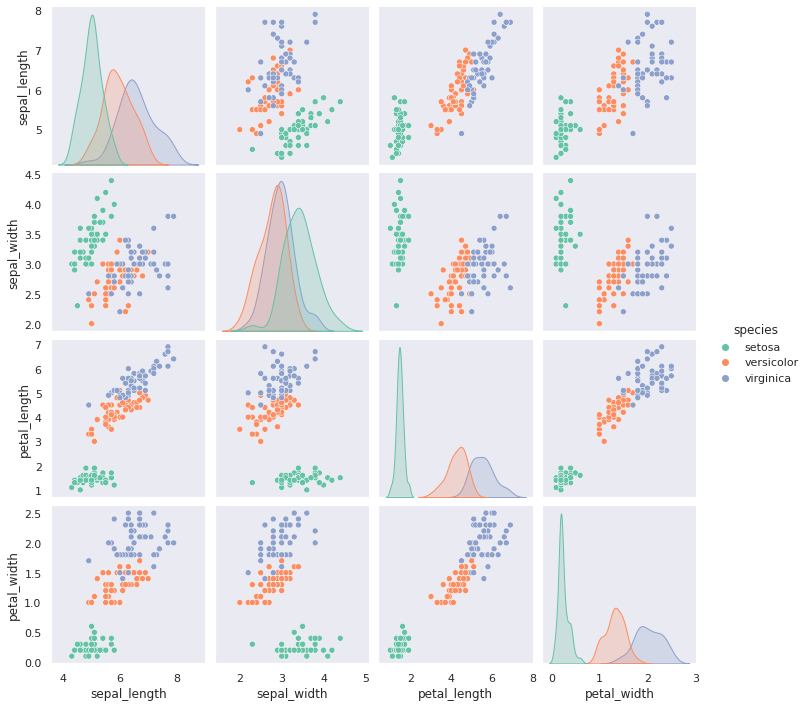

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark", color_codes=True)

iris_df = sns.load_dataset('iris')

#Visualize the dataset with 1 feature using histograms or with 2 features using scaterplot
g = sns.pairplot(iris_df, hue="species", palette="Set2", diag_kind="kde", height=2.5)


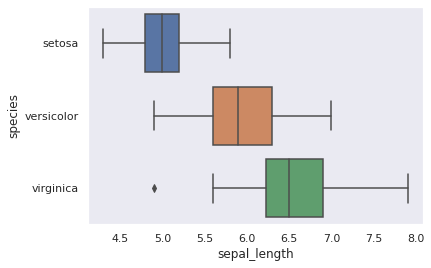

In [ ]:
# boxplot sepal length

sns.boxplot( y=iris_df["species"], x=iris_df["sepal_length"] );


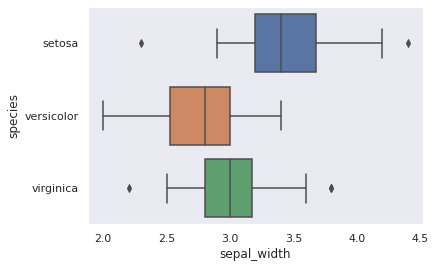

In [ ]:
# boxplot sepal width

sns.boxplot( y=iris_df["species"], x=iris_df["sepal_width"] );


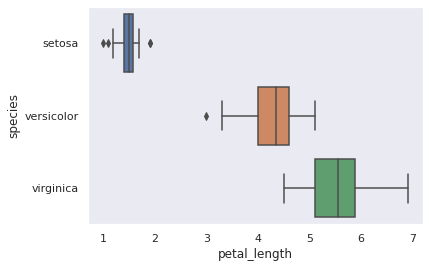

In [ ]:
# boxplot petal length

sns.boxplot( y=iris_df["species"], x=iris_df["petal_length"] );

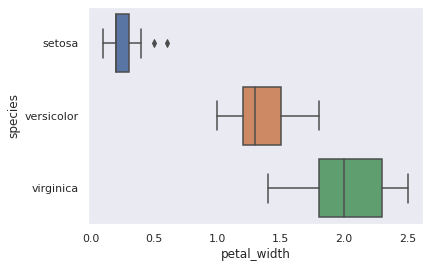

In [ ]:
# boxplot petal width

sns.boxplot( y=iris_df["species"], x=iris_df["petal_width"] );

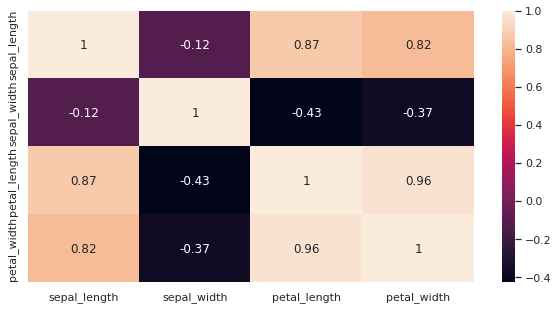

In [ ]:
# heatmap 

plt.figure(figsize = (10,5))
sns.heatmap(iris_df.corr(), annot = True)
plt.show()

Analysing the graphics, we can see that the sepal width and sepal length features have overlaps values for all species. Thus, the petal length and petal width are better predictors of the iris specie we are trying to classify.

STEP 2 - Describe what is a binary classification and multi-class classification problem and specify if the current problem is a binary or a multi-class one. 

This is a classification problem, where for the given dataset we try to predict the class of each instance based on its attributes. A binary classification problem has to define if the input belongs to one of two classes, whereas a multi-class classification problem involves predicting one among more than two classes for each input. In the iris dataset, we are given petals and sepals length and width to predict the iris flower species. The iris dataset is a multi-class problem baecause the model has to predict three differnt species: setosa, versicola, and virginica. The logistic regression algorithm is a linear model adequate for this problem because it's able to classify multi-class problems, and it can handle both dense and sparse input.  

STEP 3 - Split the data into training and testing sets

In [ ]:
# import iris dataset using sklearn 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)

# Split the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10) 
# define random_state to avoid a different random value, and subsequently avoid a different dataset split, each time we run the program 

print("Train dataset:", X_train.shape)
print("Test dataset:", X_test.shape)


Train dataset: (105, 4)
Test dataset: (45, 4)


STEP 4 - Perform pre-processing if necessary
The original dataset is from UCI Repository, but for this project we downloaded it from Sklearn. This dataset is balanced, there are exactly the same amount of samples for each class. We choose to build a pipeline to use the StandardScaler for both training and testing. 

STEP 5 - Fit the logistic regression on the training dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from numpy import mean
from numpy import std

# Implement the Transformer API to compute the mean and standard deviation on a training set 
# so as to be able to later re-apply the same transformation on the testing set.

# Create the pipeline for the scaler with Logistic Regression 
pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=10))
pipe.fit(X_train, y_train)  # apply scaling on training data
print("Score default LR:\t\t", pipe.score(X_train, y_train))

# Create the pipeline for the scaler with Logistic Regression Cross Validation
pipeCV = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=10))
pipeCV.fit(X_train, y_train)  # apply scaling on training data
print("Score default LR with CV:\t", pipeCV.score(X_train, y_train))

Score default LR:		 0.9619047619047619
Score default LR with CV:	 0.9714285714285714


STEP 6 - Tune hyperparameters (if any) based on the performance on the validation set or using cross-validation. Plot the hyperparameter value on the x-axis and performance metric on the y-axis.  


Model 0:
+----+--------------------+
| cv |      accuracy      |
+----+--------------------+
| 2  | 0.9619047619047619 |
| 3  | 0.9809523809523809 |
| 4  | 0.9619047619047619 |
| 5  | 0.9714285714285714 |
| 6  | 0.9714285714285714 |
| 7  | 0.9714285714285714 |
| 8  | 0.9714285714285714 |
| 9  | 0.9809523809523809 |
| 10 | 0.9809523809523809 |
+----+--------------------+


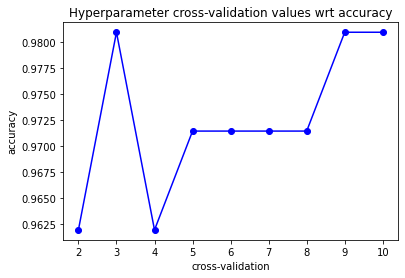

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Variables to hold hyperparameter values in test
cv=[]
acc_LRCV_metric0=[] # to hold accuracy of cv hyperparemeter for LRCV


# Model 0, tune cv hyperparameter (default is none)
print("\nModel 0:")
for n in range (2, 11):
  #print("Hyperparameter tuning: cv=", n)
  
  pipeCV0 = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=10, cv = n))
  pipeCV0.fit(X_train, y_train) 
  y_pred_0 = pipeCV0.predict(X_train)
  acc_0 = accuracy_score(y_train,y_pred_0)

  #print('\tAccuracy LRCV : %.3f (%.3f)' % (mean(acc_0), std(acc_0)))
  cv.append(n)
  acc_LRCV_metric0.append(mean(acc_0))


table = PrettyTable()
table.field_names = ['cv','accuracy']

for i in range(2,11):
  table.add_row([i, acc_LRCV_metric0[i-2]])

print(table)

plt.title("Hyperparameter cross-validation values wrt accuracy") 
plt.xlabel("cross-validation") 
plt.ylabel("accuracy") 
plt.plot(cv,acc_LRCV_metric0,marker='o', color='b')
plt.show()

The k=3, k=9, and k=10 folds cross-validation are the models with better performace when measuring accuracy. Becasue the results are the same, we decided to use k=3 to be less computationally expensive. 


Model 1:
+-----------+--------------------+--------------------+
|   solver  |       LR acc       |      LRCV acc      |
+-----------+--------------------+--------------------+
|   lbfgs   | 0.9619047619047619 | 0.9809523809523809 |
| newton-cg | 0.9619047619047619 | 0.9809523809523809 |
| liblinear | 0.8952380952380953 | 0.9333333333333333 |
|    sag    | 0.9619047619047619 | 0.9714285714285714 |
|    saga   | 0.9619047619047619 | 0.9714285714285714 |
+-----------+--------------------+--------------------+


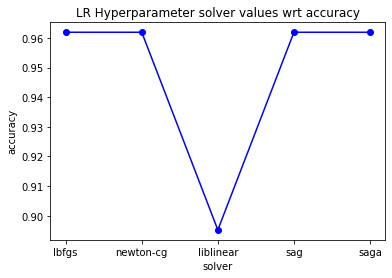

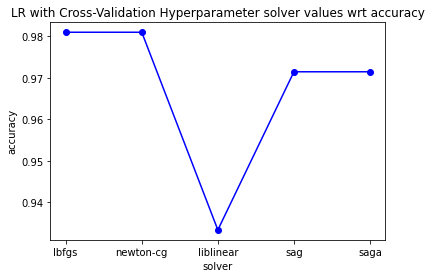

In [ ]:
acc_LR_metric1=[]     # to hold accuracy of solvers hyperparemeter for LR
acc_LRCV_metric1=[]   # to hold accuracy of solvers hyperparemeter for LRCV

# Model 1, tune solver hyperparameter (default is lbfgs’)
print("\nModel 1:")
solvers = ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
for s in solvers:
  #print("Hyperparameter tuning: solvers=", s)
  pipe1 = make_pipeline(StandardScaler(), LogisticRegression(random_state=10, solver= s))
  pipe1.fit(X_train, y_train)
  y_pred1 = pipe1.predict(X_train)
  acc1 = accuracy_score(y_train,y_pred1)
  
  pipeCV1 = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=10, cv=3, solver= s))
  pipeCV1.fit(X_train, y_train) 
  y_pred_1 = pipeCV1.predict(X_train)
  acc_1 = accuracy_score(y_train,y_pred_1)

  #print('\tAccuracy LR: %.3f (%.3f)' % (mean(acc1), std(acc1)))
  acc_LR_metric1.append(mean(acc1))
  #print('\tAccuracy LRCV : %.3f (%.3f)' % (mean(acc_1), std(acc_1)))
  acc_LRCV_metric1.append(mean(acc_1))

table = PrettyTable()
table.field_names = ['solver','LR acc', 'LRCV acc']

for i in range(len(solvers)):
  if i==0: s = 'lbfgs'
  elif i==1: s= 'newton-cg'
  elif i==2: s ='liblinear'
  elif i==3: s = 'sag'
  else: s = 'saga' 
  table.add_row([s,acc_LR_metric1[i], acc_LRCV_metric1[i]])

print(table)

plt.title("LR Hyperparameter solver values wrt accuracy") 
plt.xlabel("solver") 
plt.ylabel("accuracy") 
plt.plot(solvers,acc_LR_metric1,marker='o', color='b')
plt.show()

plt.title("LR with Cross-Validation Hyperparameter solver values wrt accuracy") 
plt.xlabel("solver") 
plt.ylabel("accuracy") 
plt.plot(solvers,acc_LRCV_metric1,marker='o', color='b')
plt.show()

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss. In this test, we can see that newton-cg and lbfgs are the solvers with better accuracy. We decided to choose lbfgs that is the default solver.

In [ ]:
warm_start = [False, True]

# Model 2, tune max_iterations hyperparameter (default is 100)
print("\nModel 2:")
for n in [100, 500, 1000, 2000, 10000]:
  pipeCV2 = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=10, cv=3, max_iter= n))
  pipeCV2.fit(X_train, y_train) 
  y_pred_2 = pipeCV2.predict(X_train)
  acc_2 = accuracy_score(y_train,y_pred_2)
  print('\tAccuracy LRCV %.0f max_iter: %.3f (%.3f)' % (n, mean(acc_2), std(acc_2)))



Model 2:
	Accuracy LRCV 100 max_iter: 0.981 (0.000)
	Accuracy LRCV 500 max_iter: 0.981 (0.000)
	Accuracy LRCV 1000 max_iter: 0.981 (0.000)
	Accuracy LRCV 2000 max_iter: 0.981 (0.000)
	Accuracy LRCV 10000 max_iter: 0.981 (0.000)


Based on the results of the tests above, we decided on the following hyperparameters values:
- cv = 3

In [ ]:
from sklearn.model_selection import cross_val_score

# Use the best model 
scores = cross_val_score(pipeCV2, X_train, y_train)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.962 (0.036)


STEP 7 - Evaluate it on test data and generate a classification report 

Model Evaluation: 
*   Confusion Matrix ->  Cij is equal to the number of observations known to be in group 'i' and predicted to be in group 'j'. Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class
*   Accuracy -> a fraction of correctly classified samples over the total samples on dataset (% total correct predictions)
*   F1 score -> The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0 ( F1 = 2 * (precision * recall) / (precision + recall) ) 
* Precision -> the fraction of correctly classified positive over the total predicted positive (measures how precise the predictions are)
* Recall -> the fraction of correctly classified positive over the total true positive (indicates what percentage of the classes we’re interested in were actually captured by the model)

+-------------------+-------------------+
|        Data       | Predicted species |
+-------------------+-------------------+
| [6.3 2.3 4.4 1.3] |     versicolor    |
| [6.4 2.7 5.3 1.9] |     virginica     |
| [5.4 3.7 1.5 0.2] |       setosa      |
| [6.1 3.  4.6 1.4] |     versicolor    |
| [5.  3.3 1.4 0.2] |       setosa      |
| [5.  2.  3.5 1. ] |     versicolor    |
| [6.3 2.5 4.9 1.5] |     versicolor    |
| [5.8 2.7 4.1 1. ] |     versicolor    |
| [5.1 3.4 1.5 0.2] |       setosa      |
| [5.7 2.8 4.5 1.3] |     versicolor    |
| [5.6 3.  4.5 1.5] |     versicolor    |
| [5.8 2.7 5.1 1.9] |     virginica     |
| [5.5 2.3 4.  1.3] |     versicolor    |
| [4.9 3.  1.4 0.2] |       setosa      |
| [5.1 3.8 1.5 0.3] |       setosa      |
| [6.8 3.  5.5 2.1] |     virginica     |
| [6.  3.4 4.5 1.6] |     versicolor    |
| [4.4 3.  1.3 0.2] |       setosa      |
| [5.1 3.7 1.5 0.4] |       setosa      |
| [5.  3.2 1.2 0.2] |       setosa      |
| [7.1 3.  5.9 2.1] |     virginic

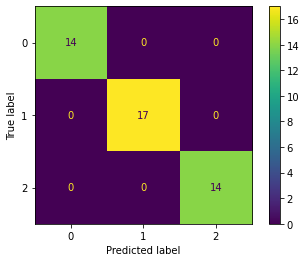


Accuracy: 1.000

F1 score: [1. 1. 1.]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from prettytable import PrettyTable

# Use the best performance model during training and validation on test dataset
y_pred = pipeCV2.predict(X_test)

t = PrettyTable(['Data', 'Predicted species'])

for i in range(len(y_pred)):
  if y_pred[i]==0:s='setosa'
  elif y_pred[i]==1:s='versicolor'
  elif y_pred[i]==2:s='virginica'
  t.add_row([X_test[i], s])
print(t)  

print("\nConfusion Matrix:\n" )
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)


The final metrics of this model show that we can reach a high accuracy of 100% with a high F1-score of 100% on all classes with the testing dataset. 